In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.nn import CrossEntropyLoss
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Função para mostrar as predições vs valores reais
def show_results(model, dataloader):
    model.eval()  # Muda para modo de avaliação
    with torch.no_grad():
        for i, (feature, target) in enumerate(dataloader):
            if i == 0:  # Mostra apenas o primeiro batch
                prediction = model(feature)
                print("\nPredições vs Valores reais:")
                for j in range(len(prediction)):
                    print(f"Predito: {prediction[j].item():.4f}, Real: {target[j].item():.4f}")
                break

In [ ]:
# Configurações iniciais
num_epochs = 50
batch_size = 16
learning_rate = 0.01

# Gerando um dataset sintético para regressão
torch.manual_seed(42)
num_samples = 100

# Cria features de 16 dimensões representando, por exemplo, 16 medições normalizadas
features = torch.linspace(0, 1, steps=num_samples*16).view(num_samples, 16)

# Cria targets contínuos que fazem sentido: a soma das 16 medições com um ruído pequeno
targets = features.sum(dim=1, keepdim=True) + 0.1 * torch.randn(num_samples, 1)


# Criação do dataset e do dataloader
dataset = TensorDataset(features, targets)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definição do modelo para regressão
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4), 
    nn.Linear(4, 1)  # Saída com 1 neurônio para prever um valor contínuo
)

# Função de custo MSE para regressão e otimizador Adam
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Armazenando a perda para plotagem
loss_history = []

# Loop de treinamento
for epoch in range(num_epochs):
    epoch_loss = 0
    for data in dataloader:
        # Zerando os gradientes
        optimizer.zero_grad()
        
        # Forward pass: obtém as features e targets
        feature, target = data
        prediction = model(feature)
        
        # Calcula a perda
        loss = criterion(prediction, target)
        epoch_loss += loss.item()
        
        # Backpropagation e atualização dos pesos
        loss.backward()
        optimizer.step()
    
    loss_history.append(epoch_loss / len(dataloader))
    print(f"Época {epoch+1}/{num_epochs}, Loss: {loss_history[-1]:.4f}")

Época 1/50, Loss: 86.4607
Época 2/50, Loss: 65.8385
Época 3/50, Loss: 39.8812
Época 4/50, Loss: 5.9245
Época 5/50, Loss: 5.8172
Época 6/50, Loss: 1.7959
Época 7/50, Loss: 1.1708
Época 8/50, Loss: 0.9283
Época 9/50, Loss: 0.2892
Época 10/50, Loss: 0.3697
Época 11/50, Loss: 0.2053
Época 12/50, Loss: 0.1782
Época 13/50, Loss: 0.1461
Época 14/50, Loss: 0.1490
Época 15/50, Loss: 0.1088
Época 16/50, Loss: 0.0966
Época 17/50, Loss: 0.1002
Época 18/50, Loss: 0.0912
Época 19/50, Loss: 0.0771
Época 20/50, Loss: 0.0649
Época 21/50, Loss: 0.0556
Época 22/50, Loss: 0.0560
Época 23/50, Loss: 0.0524
Época 24/50, Loss: 0.0369
Época 25/50, Loss: 0.0348
Época 26/50, Loss: 0.0301
Época 27/50, Loss: 0.0286
Época 28/50, Loss: 0.0273
Época 29/50, Loss: 0.0225
Época 30/50, Loss: 0.0211
Época 31/50, Loss: 0.0182
Época 32/50, Loss: 0.0182
Época 33/50, Loss: 0.0157
Época 34/50, Loss: 0.0183
Época 35/50, Loss: 0.0143
Época 36/50, Loss: 0.0140
Época 37/50, Loss: 0.0128
Época 38/50, Loss: 0.0120
Época 39/50, Loss:

In [ ]:
# Exibindo os resultados
show_results(model, dataloader)


Predições vs Valores reais:
Predito: 4.0999, Real: 4.2072
Predito: 4.4193, Real: 4.5312
Predito: 12.7231, Real: 12.6479
Predito: 10.1681, Real: 10.2997
Predito: 12.8827, Real: 12.8841
Predito: 9.3696, Real: 9.3545
Predito: 11.9246, Real: 11.9281
Predito: 0.5868, Real: 0.3448
Predito: 7.4534, Real: 7.3162
Predito: 1.0658, Real: 1.0313
Predito: 13.0424, Real: 13.0093
Predito: 15.2781, Real: 15.2542
Predito: 13.6812, Real: 13.7419
Predito: 10.6471, Real: 10.8635
Predito: 11.7649, Real: 11.8147
Predito: 0.1077, Real: 0.2677


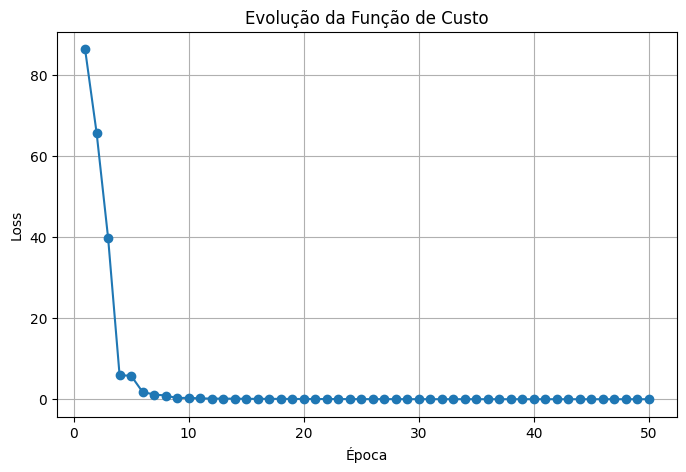

In [ ]:
# Plotando a evolução da função de custo (loss)
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), loss_history, marker='o', linestyle='-')
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Função de Custo")
plt.grid()
plt.show()

In [ ]:
# Configurações
num_epochs = 200
batch_size = 16
learning_rate = 0.01
num_samples = 100

# Geração de dados para classificação binária:
# Cria features de 16 dimensões com valores entre 0 e 1
features = torch.rand(num_samples, 16)
# Cria targets binários: 1 se a soma das features for maior que 8, 0 caso contrário
targets = (features.sum(dim=1) > 8).float().unsqueeze(1)

# Criação do dataset e do dataloader
dataset = TensorDataset(features, targets)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definição do modelo para classificação binária:
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 1),  # Alterado para 1 saída
    nn.Sigmoid()      # Função de ativação final sigmoide
)

# Função de custo (log loss para classificação binária) e otimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Treinamento do modelo
loss_history = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for feature_batch, target_batch in dataloader:
        optimizer.zero_grad()
        prediction = model(feature_batch)
        loss = criterion(prediction, target_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)
    print(f"Época {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Época 1/200, Loss: 0.6903
Época 2/200, Loss: 0.6746
Época 3/200, Loss: 0.6731
Época 4/200, Loss: 0.6429
Época 5/200, Loss: 0.6380
Época 6/200, Loss: 0.6201
Época 7/200, Loss: 0.6181
Época 8/200, Loss: 0.5810
Época 9/200, Loss: 0.5543
Época 10/200, Loss: 0.5014
Época 11/200, Loss: 0.5059
Época 12/200, Loss: 0.5264
Época 13/200, Loss: 0.4664
Época 14/200, Loss: 0.4941
Época 15/200, Loss: 0.4917
Época 16/200, Loss: 0.4624
Época 17/200, Loss: 0.5071
Época 18/200, Loss: 0.3988
Época 19/200, Loss: 0.4341
Época 20/200, Loss: 0.3831
Época 21/200, Loss: 0.3893
Época 22/200, Loss: 0.3647
Época 23/200, Loss: 0.3727
Época 24/200, Loss: 0.4367
Época 25/200, Loss: 0.3429
Época 26/200, Loss: 0.3549
Época 27/200, Loss: 0.3869
Época 28/200, Loss: 0.3201
Época 29/200, Loss: 0.3234
Época 30/200, Loss: 0.3302
Época 31/200, Loss: 0.3067
Época 32/200, Loss: 0.3190
Época 33/200, Loss: 0.2973
Época 34/200, Loss: 0.3011
Época 35/200, Loss: 0.3014
Época 36/200, Loss: 0.3307
Época 37/200, Loss: 0.3548
Época 38/2

In [ ]:
# Exibindo predições vs valores reais
model.eval()
with torch.no_grad():
    predictions = model(features[:20])
    print("\nPredições vs Valores reais:")
    for pred, real in zip(predictions, targets[:20]):
        print(f"Predito: {pred[0]}, Real: {real[0]}")



Predições vs Valores reais:
Predito: 5.577459774031013e-07, Real: 0.0
Predito: 0.0003810686175711453, Real: 0.0
Predito: 0.0005081885028630495, Real: 0.0
Predito: 4.5518336264649406e-05, Real: 0.0
Predito: 0.9943079352378845, Real: 1.0
Predito: 0.9999977350234985, Real: 1.0
Predito: 0.9964034557342529, Real: 1.0
Predito: 0.9460678100585938, Real: 1.0
Predito: 4.5621918616234325e-06, Real: 0.0
Predito: 0.9871405959129333, Real: 1.0
Predito: 0.00013431150000542402, Real: 0.0
Predito: 0.994937539100647, Real: 1.0
Predito: 0.9888916015625, Real: 1.0
Predito: 0.029552079737186432, Real: 0.0
Predito: 1.0, Real: 1.0
Predito: 0.004442770034074783, Real: 0.0
Predito: 0.0015790361212566495, Real: 0.0
Predito: 0.9948803186416626, Real: 1.0
Predito: 0.99910968542099, Real: 1.0
Predito: 0.9853752851486206, Real: 1.0


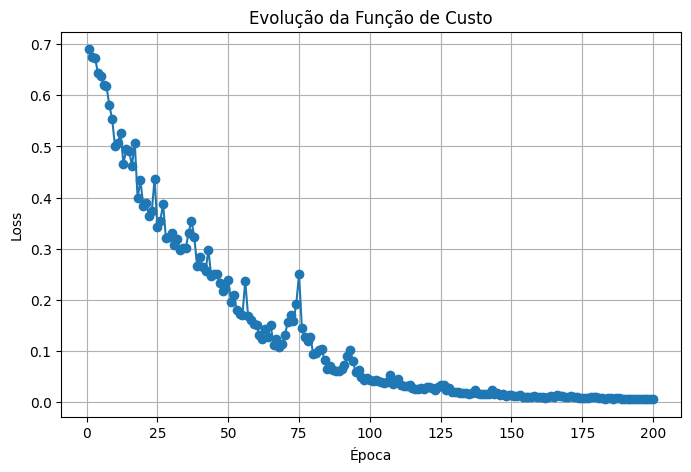

In [ ]:
# Plotando a evolução da função de custo
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), loss_history, marker='o')
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Função de Custo")
plt.grid(True)
plt.show()

In [ ]:
# Configurações
num_epochs = 50
batch_size = 16
learning_rate = 0.01
num_samples = 100

# Geração de dados para classificação com 3 classes:
# Cria features de 16 dimensões com valores entre 0 e 1
features = torch.rand(num_samples, 16)

# Define as classes com base na soma das features:
# Se soma < 16/3       -> classe 0
# Se 16/3 <= soma < 2*16/3 -> classe 1
# Se soma >= 2*16/3     -> classe 2
sums = features.sum(dim=1)
threshold1 = 16 / 3
threshold2 = 2 * 16 / 3
targets = torch.where(sums < threshold1, 0, torch.where(sums < threshold2, 1, 2))

# Criação do dataset e do dataloader
dataset = TensorDataset(features, targets)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definição do modelo para classificação com 3 classes (sem softmax na última camada)
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 3)  # Saída com 3 logits (um para cada classe)
)

# Função de custo CrossEntropyLoss e otimizador Adam
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Treinamento do modelo
loss_history = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for feature_batch, target_batch in dataloader:
        optimizer.zero_grad()
        prediction = model(feature_batch)
        loss = criterion(prediction, target_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)
    print(f"Época {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Época 1/50, Loss: 1.0553
Época 2/50, Loss: 0.7318
Época 3/50, Loss: 0.4522
Época 4/50, Loss: 0.2128
Época 5/50, Loss: 0.0841
Época 6/50, Loss: 0.1442
Época 7/50, Loss: 0.0422
Época 8/50, Loss: 0.0410
Época 9/50, Loss: 0.0411
Época 10/50, Loss: 0.0410
Época 11/50, Loss: 0.0408
Época 12/50, Loss: 0.0406
Época 13/50, Loss: 0.0401
Época 14/50, Loss: 0.0397
Época 15/50, Loss: 0.0397
Época 16/50, Loss: 0.0398
Época 17/50, Loss: 0.0391
Época 18/50, Loss: 0.0387
Época 19/50, Loss: 0.0387
Época 20/50, Loss: 0.0390
Época 21/50, Loss: 0.0385
Época 22/50, Loss: 0.0380
Época 23/50, Loss: 0.0378
Época 24/50, Loss: 0.0375
Época 25/50, Loss: 0.0374
Época 26/50, Loss: 0.0374
Época 27/50, Loss: 0.0368
Época 28/50, Loss: 0.0368
Época 29/50, Loss: 0.0362
Época 30/50, Loss: 0.0362
Época 31/50, Loss: 0.0359
Época 32/50, Loss: 0.0355
Época 33/50, Loss: 0.0353
Época 34/50, Loss: 0.1246
Época 35/50, Loss: 0.0342
Época 36/50, Loss: 0.0354
Época 37/50, Loss: 0.0344
Época 38/50, Loss: 0.0344
Época 39/50, Loss: 0.

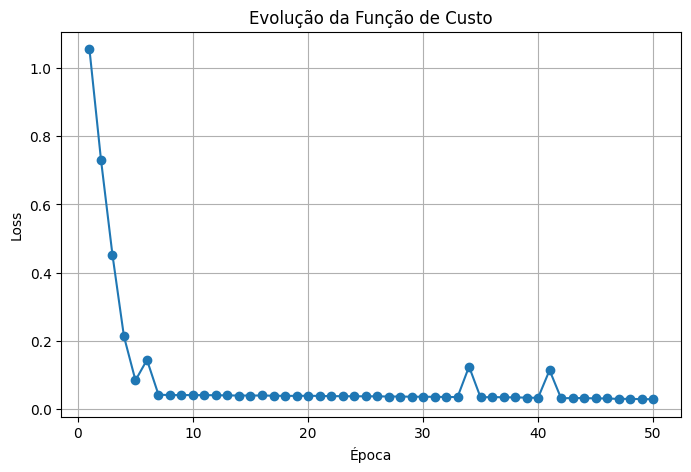

In [ ]:
# Plotando a evolução da função de custo
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), loss_history, marker='o')
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Função de Custo")
plt.grid(True)
plt.show()